In [1]:
from encoder import Model
import pandas as pd
import numpy as np
import csv
import time
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
import pickle
import warnings
warnings.filterwarnings('ignore')
%load_ext autoreload
%autoreload 2

In [2]:
model = Model()

In [ ]:
train_reviews = []
train_polarities = []
with open('yelp_review_polarity_csv/train.csv', 'rb') as f:
    reviews_with_polarity = list(csv.reader(f))
    train_reviews = map(lambda x: x[1], reviews_with_polarity)
    train_polarities = map(lambda x: int(x[0]), reviews_with_polarity)

In [3]:
test_reviews = []
test_polarities = []
with open('yelp_review_polarity_csv/test.csv', 'rb') as f:
    reviews_with_polarity = list(csv.reader(f))
    test_reviews = map(lambda x: x[1], reviews_with_polarity)
    test_polarities = map(lambda x: int(x[0]), reviews_with_polarity)

In [ ]:
start_time = time.time()
X_test = model.transform(test_reviews)
duration = time.time() - start_time

In [ ]:
len(test_reviews[0])

In [4]:
feats, sentiments = model.transform([test_reviews[0]], track_sentiment=True)

iterating through each batch for step 0
tracking sentiment.. (2, 1, 4096) (64, 1, 4096)
done with batch iteration
iterating through each batch for step 64
tracking sentiment.. (2, 1, 4096) (64, 1, 4096)
done with batch iteration
iterating through each batch for step 128
tracking sentiment.. (2, 1, 4096) (64, 1, 4096)
done with batch iteration
iterating through each batch for step 192
tracking sentiment.. (2, 1, 4096) (64, 1, 4096)
done with batch iteration
iterating through each batch for step 256
tracking sentiment.. (2, 1, 4096) (64, 1, 4096)
done with batch iteration
iterating through each batch for step 320
tracking sentiment.. (2, 1, 4096) (64, 1, 4096)
done with batch iteration
iterating through each batch for step 384
tracking sentiment.. (2, 1, 4096) (64, 1, 4096)
done with batch iteration
iterating through each batch for step 448
tracking sentiment.. (2, 1, 4096) (64, 1, 4096)
done with batch iteration
iterating through each batch for step 512
tracking sentiment.. (2, 1, 4096)

In [5]:
sentiment_values = np.array(sentiments).flatten()

In [6]:
len(feats[0]), len(sentiment_values), len(test_reviews[0])

(4096, 640, 681)

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

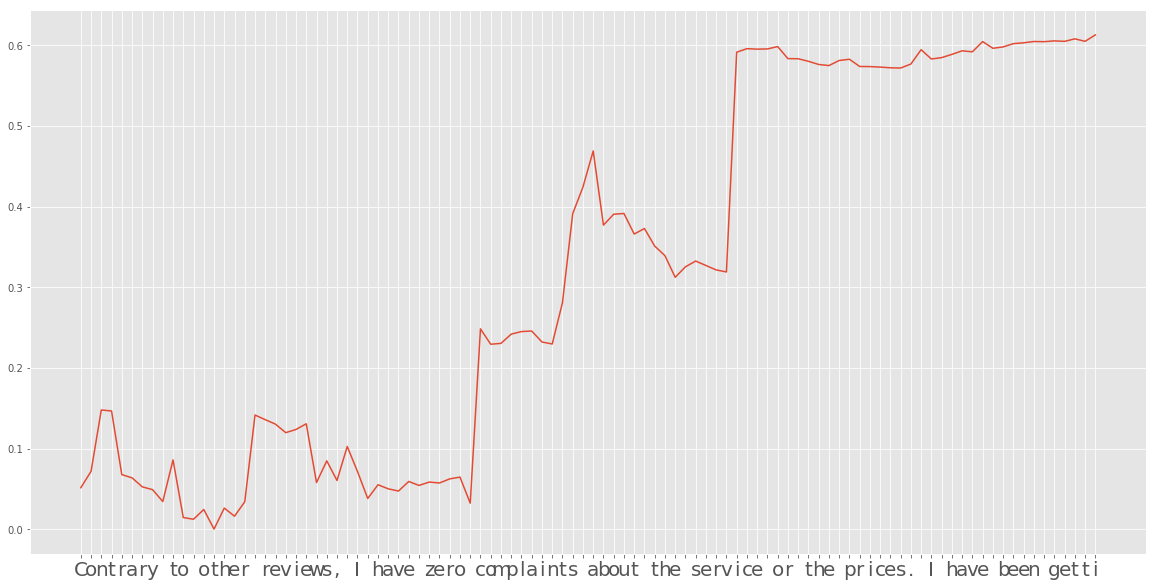

In [8]:
plt.figure(figsize=(20,10))
n_limit = 100
plt.xticks(range(0,n_limit), list(test_reviews[0])[:n_limit], rotation='0', fontsize=20)
#plt.setp(ax.get_xticklabels())
plt.plot(sentiment_values[:n_limit])

In [ ]:
pickle.dump(X_test, open('transformed_test_reviews.p','wb'))

In [ ]:
X_test = pickle.load(open('transformed_test_reviews.p','rb'))

In [ ]:
len(X_test[0])

In [ ]:
sentiment_indicator_test = X_test[:, 2388]

In [ ]:
sentiment_indicator_test[:5]

In [ ]:
sentiment_predictions = map(lambda x : 2 if x > 0 else 1, sentiment_indicator_test)

In [ ]:
accuracy = accuracy_score(test_polarities,sentiment_predictions)
print accuracy, 1-accuracy

In [ ]:
# lr = LogisticRegression(C=0.1)
# lr.fit(train_features, train_polarities)

TODO: Do some failure analysis - sentiment tracker on the mismatched reviews. See if you can spot a pattern
Do similar analysis on successful analysis and look for patterns

Think of a better way of visualizing the above

Clean up the code - both in notebook and in scripts (remove print statements etc)

Think if you can fix the batch truncation issue - see if that is indeed affecting the results